One-Dimensional Fourier Transform

1. Imports

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

2. Create a Sample Signal
   Let's create a signal composed of two sine waves with different frequencies.

In [10]:
# One-dimensional Fourier Transform
def create_signal():
    # Sampling parameters
    Fs = 1000  # Sampling frequency (samples per second)
    T = 1 / Fs  # Sampling interval (seconds per sample)
    N = 2000  # Number of samples
    # The linspace() function returns
    # an array of evenly spaced values within the specified interval [start, stop].
    t = np.linspace(0, N * T, N, endpoint=False)  # Time vector
    print(f"Time vector: {t}")

    # Signal parameters
    f1 = 50  # Frequency of the first sine wave (Hz)
    f2 = 120  # Frequency of the second sine wave (Hz)

    first_signal = 0.7 * np.sin(2 * np.pi * f1 * t)  # First sine wave
    second_signal = 1.0 * np.sin(2 * np.pi * f2 * t)  # Second sine wave
    # Create the signal
    combine_signal = first_signal + second_signal
    return combine_signal, N, T, first_signal, second_signal, t

In [39]:
def plot_signal(t, first_signal, first_name, second_signal, second_name):
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.title(first_name)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    # Plotting both the curves simultaneously
    plt.plot(t, first_signal, color='r', label='first signal')
    # plt.plot(t, second_signal, color='g', label='second signal')


    plt.subplot(1, 2, 2)
    plt.title(second_name)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.plot(t, second_signal, color='g', label='second signal')

    # Adding legend, which helps us recognize the curve according to it's color
    plt.legend()
    # plt.xlim(0, 200)  # Limit x-axis for better visibility
    # plt.tight_layout()
    # To load the display window
    plt.show()

Time vector: [0.000e+00 1.000e-03 2.000e-03 ... 1.997e+00 1.998e+00 1.999e+00]


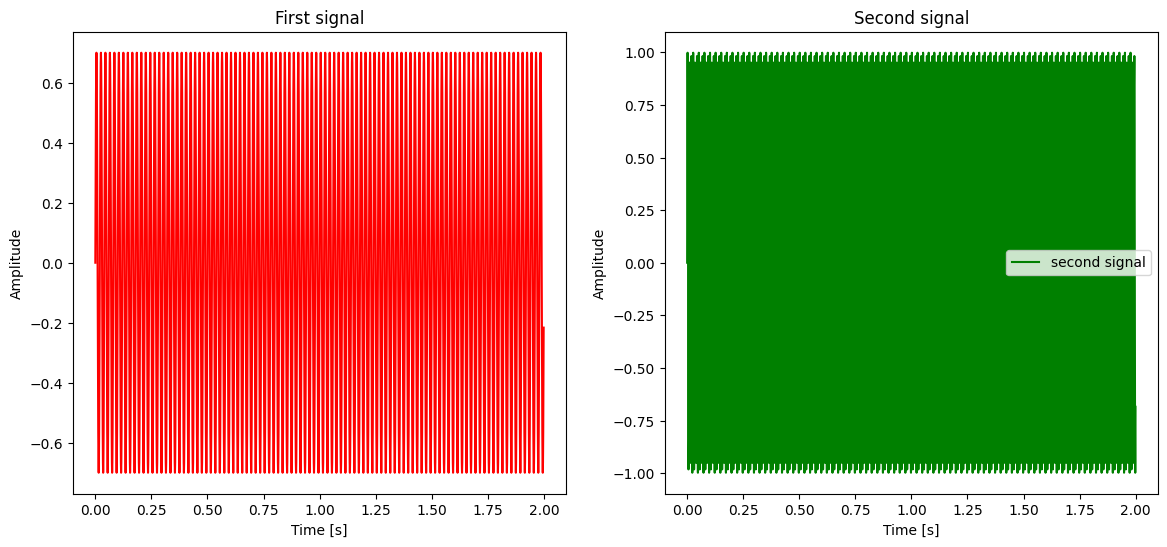

In [41]:
signal, N, T, first_signal, second_signal, t = create_signal()
plot_signal(t, first_signal, "First signal", second_signal, "Second signal")

3. Compute the Fourier Transform
   - Use SciPy

In [ ]:
def fourier_transform(signal, N, T):
    # Compute the FFT (Fast Fourier Transform)
    fft_values = fft(signal)
    freqs = fftfreq(N, T)
    return freqs, fft_values

4. Process the FFT Output
   + The FFT output is complex, containing both amplitude and phase information. To analyze the amplitude spectrum:

In [ ]:
def process_output(freqs, fft_values, N):
    # Compute the magnitude spectrum
    magnitude = np.abs(fft_values) / N  # Normalize the amplitude

    # Since the FFT output is symmetric, take only the positive half
    pos_mask = freqs >= 0
    freqs = freqs[pos_mask]
    magnitude = magnitude[pos_mask]
    return freqs, magnitude

5. Plot the Original Signal and Its Fourier Transform
   - Output: This will display the time-domain signal and its frequency spectrum, showing peaks at 50 Hz and 120 Hz.

In [ ]:
def plot_fourier_transform(signal, t, freqs, magnitude):
    # Plot the time-domain signal
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(t, signal)
    plt.title('Time-Domain Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')

    # Plot the frequency-domain signal
    plt.subplot(1, 2, 2)
    plt.stem(freqs, magnitude, 'b', markerfmt=" ", basefmt="-b")
    plt.title('Frequency-Domain Signal')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude')
    plt.xlim(0, 200)  # Limit x-axis for better visibility
    plt.tight_layout()
    plt.show()

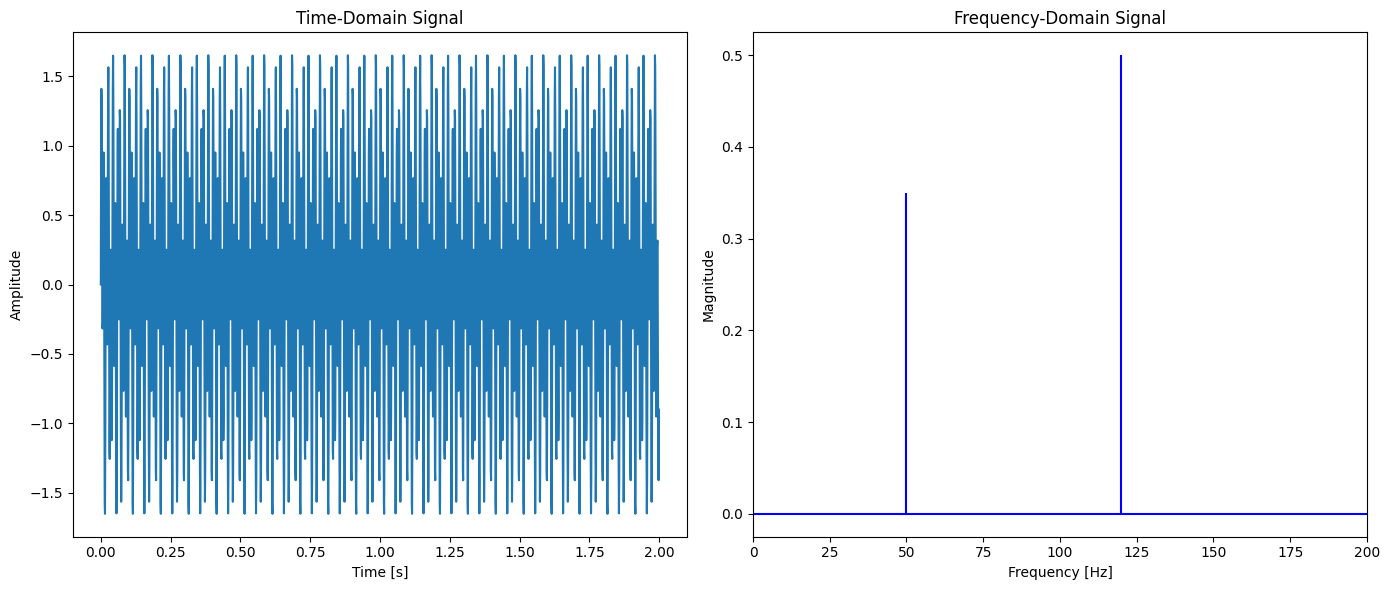

In [ ]:
freqs, fft_values = fourier_transform(signal, N, T)
freqs, magnitude = process_output(freqs, fft_values, N)
plot_fourier_transform(signal, np.linspace(0, N * T, N, endpoint=False), freqs, magnitude)

In [ ]:
def inverse_fourier_transform(fft_values):
    print(f'FFT values: {fft_values}')
    # Compute the inverse FFT
    reconstructed_signal = np.fft.ifft(fft_values)
    print(f'Reconstructed signal: {reconstructed_signal}')

    # Since the inverse FFT may introduce small imaginary parts due to numerical errors, take the real part
    reconstructed_signal = np.abs(reconstructed_signal.real)
    print(f'Reconstructed signal (real part): {reconstructed_signal}')

    # Verify that the reconstructed signal matches the original signal
    difference = np.max(np.abs(signal - reconstructed_signal))
    print(f'Max difference between original and reconstructed signal: {difference}')
    return reconstructed_signal, difference


FFT values: [-1.39948043e-12-0.00000000e+00j  2.25733177e-13-8.61523948e-13j
  1.84404935e-13-1.46735846e-14j ...  1.95106458e-13+1.65587531e-14j
  1.84404935e-13+1.46735846e-14j  2.25733177e-13+8.61523948e-13j]
Reconstructed signal: [ 9.69352280e-30+5.68434189e-17j  9.00859002e-01+2.01948392e-30j
  1.40947641e+00+0.00000000e+00j ... -1.33682514e+00+8.33519665e-17j
 -1.40947641e+00-1.25755686e-17j -9.00859002e-01-5.01637573e-17j]
Reconstructed signal (real part): [9.69352280e-30 9.00859002e-01 1.40947641e+00 ... 1.33682514e+00
 1.40947641e+00 9.00859002e-01]
Max difference between original and reconstructed signal: 3.3021130325904338


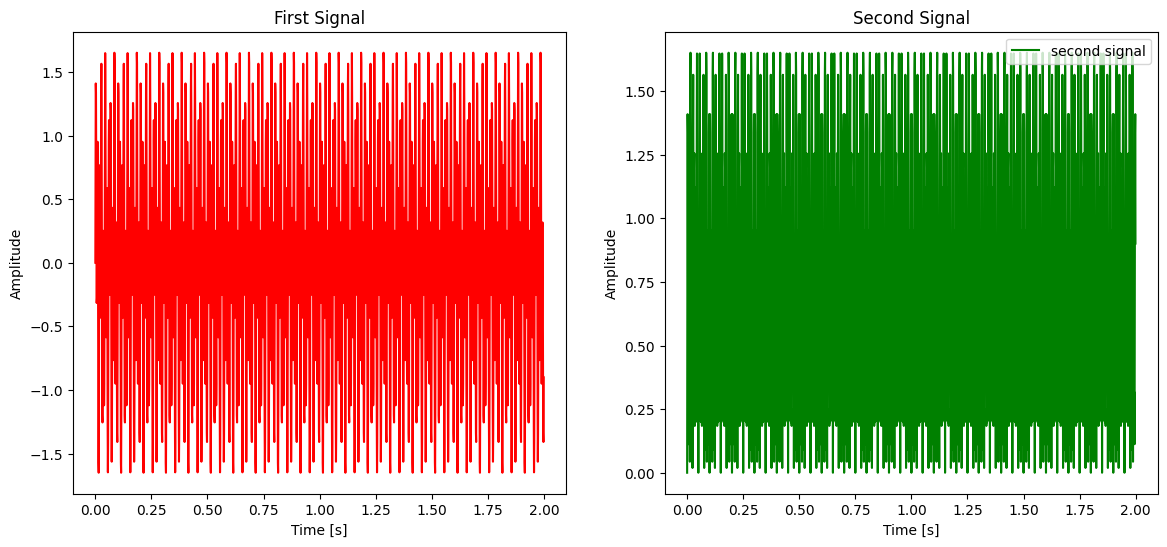

In [ ]:
reconstructed_signal, difference = inverse_fourier_transform(fft_values)
plot_signal(t, signal, "Orignal signal", reconstructed_signal, "Reconstructed signal")